# Fractal visualisation

Let $u:\mathbb{C}\mapsto\mathbb{C}$ and $v:\mathbb{C}\times\mathbb{C}\mapsto\mathbb{C}$. We consider the set of complex numbers $c$ such that the sequence inductively defined by
\begin{equation}
z_0(c)\triangleq u(c) \hspace{1cm} z_{n+1}(c) \triangleq v(z_n(c),c)
\end{equation}
remains bounded. The problem is to give a visual representation of that set.

The proposed representation is obtained iteratively, where each iteration increases the precision level. A point $c$ is coloured at iteration $n$ by the real value $\frac{m}{n}$ where $m$ is the smallest $m<n$ such that $|z_m(c)|>q$ where $q$ is an escape radius of the sequence (or $m=n$ if there is no such value).

Documentation: [here](../doc/_build/html/fractals.html)

Examples:

* The Julia set for $f:\mathbb{C}\mapsto\mathbb{C}$ is characterised by $u(c)=c$ and $v(z,c)=f(z)$ independent of $c$.
* The Mandelbrot set is characterised by $u(c)=0$ and $v(z,c)=z^2+c$

In [1]:
%pylab nbagg
# for better display performance, use default backend

import logging
logger = logging.getLogger()

from ipyshow.fractals.fractal import Fractal
from functools import partial

def julia(f,eradius=2.,ibounds=((-1.5,1.5),(-1.5,1.5))):
    def main(c,f=f):
        z = c
        while True:
            yield z
            z[...] = f(z)
    return Fractal(main,eradius,ibounds)

@partial(Fractal,ibounds=((-2.5,1.),(-1.,1.)),eradius=2.)
def mandelbrot(c):
    z = c.copy()
    while True:
        yield z
        square(z,z)
        z += c

Populating the interactive namespace from numpy and matplotlib


In [2]:
Fractal.helper()

Control of the interface:
* Open a new zoom level by selecting a rectangle with the mouse (button click on one corner, keep pressed, and release on opposite corner).
* Navigate through the different zoom levels using the arrow keys on the keyboard (up or right = forward, down or left = backward)
* The zoom level is indicated in the top right corner. The precision is indicated in the top left corner. At deeper zoom levels, details start to appear at higher precision levels.

<IPython.core.display.Javascript object>


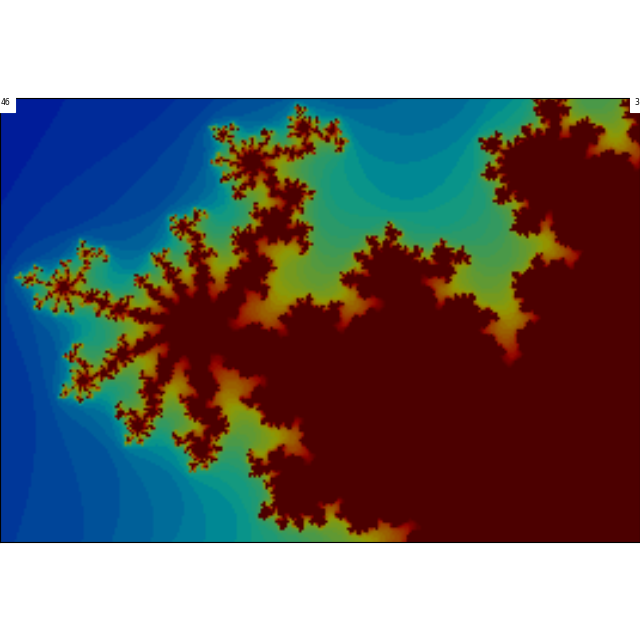

In [3]:
logger.setLevel(logging.INFO)

syst = mandelbrot
#syst = julia(lambda z: square(z)-.4+.6j)
#syst = julia(lambda z: square(z)-.8+.156j)
#syst = julia(lambda z: square(z)+.285+.01j)
#syst = julia(lambda z: z*square(z)+.4)
#syst = julia(lambda z: z**7+.626)
#syst = julia(lambda z: exp(z*square(z))-.59)
#syst = julia(lambda z: exp(z*square(z))+-.621)
#syst = julia(lambda z: z-(z-1./square(z))/3.)

syst.launch(resolution=50000)